<a href="https://colab.research.google.com/github/apchavezr/Fundamentos-de-Estad-stica---Ciencia-de-Datos/blob/main/intervalo_confianza_datos_salario_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intervalo de confianza del salario mensual estimado

Este notebook calcula el intervalo de confianza para el salario mensual estimado, utilizando datos reales del Sistema del Subsidio Familiar (archivo cargado).

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## 1. Cargar los datos del archivo

In [2]:
df = pd.read_csv('Poblaci_n_Sistema_del_Subsidio_Familiar_20250406.csv')
df.head()

,Mes,CCF,Empresas Afiliadas,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,Año,Cantidad de Afiliados,Trabajadores Empleados Dependientes,No Afiliados con Derecho a Subsidios,Personas a Cargo,Total Población Cubierta
0,1,Caja de Compensación Familiar COMFENALCO ANTIO...,30117,9426.0,2361.0,2884.0,2024,438736,415453,8612.0,447995,886731
1,1,Caja de Compensación Familiar de Antioquia: CO...,206909,44017.0,15588.0,24198.0,2024,1374505,1263204,27498.0,1288914,2663419
2,1,Caja de Compensación Familiar de Barranquilla:...,14295,1334.0,362.0,51.0,2024,178707,172487,4473.0,207916,386623
3,1,Caja de Compensación Familiar COMFAMILIAR Del ...,20399,486.0,1975.0,0.0,2024,265243,258351,4431.0,320693,585936
4,1,Caja de Compensación Familiar de Fenalco: Andi...,33277,810.0,419.0,72.0,2024,260385,254221,4863.0,290125,550510


## 2. Simular variable `salario_mensual`

Dado que el dataset no incluye valores individuales de salario mensual, estimaremos un salario promedio aleatorio para cada observación con base en rangos observados en el sector público.

In [3]:
np.random.seed(42)
df['salario_mensual'] = np.random.normal(loc=2800000, scale=400000, size=len(df))
df[['CCF', 'salario_mensual']].head()

,CCF,salario_mensual
0,Caja de Compensación Familiar COMFENALCO ANTIO...,2.998686e+06
1,Caja de Compensación Familiar de Antioquia: CO...,2.744694e+06
2,Caja de Compensación Familiar de Barranquilla:...,3.059075e+06
3,Caja de Compensación Familiar COMFAMILIAR Del ...,3.409212e+06
4,Caja de Compensación Familiar de Fenalco: Andi...,2.706339e+06


## 3. Cálculo del intervalo de confianza del 95%

In [4]:
media = df['salario_mensual'].mean()
desviacion = df['salario_mensual'].std(ddof=1)
n = len(df)
SE = desviacion / np.sqrt(n)
t_critico = stats.t.ppf(0.975, df=n-1)

IC_inf = media - t_critico * SE
IC_sup = media + t_critico * SE

print(f"Media estimada del salario mensual: ${media:,.0f}")
print(f"Intervalo de confianza 95%: (${IC_inf:,.0f}, ${IC_sup:,.0f})")

Media estimada del salario mensual: $2,804,301
Intervalo de confianza 95%: ($2,769,849, $2,838,753)


## 4. Visualización del intervalo de confianza

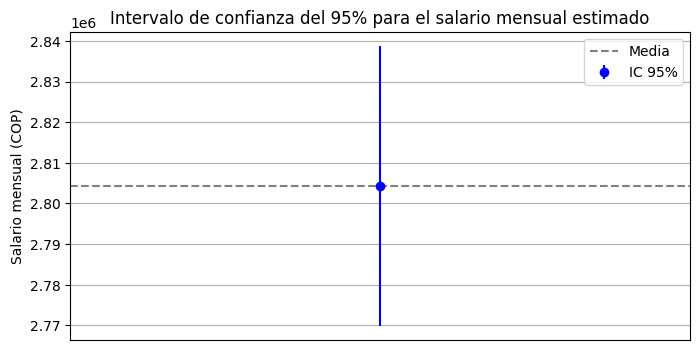

In [5]:
plt.figure(figsize=(8, 4))
plt.errorbar(x=1, y=media, yerr=t_critico*SE, fmt='o', color='blue', label='IC 95%')
plt.axhline(media, color='gray', linestyle='--', label='Media')
plt.title('Intervalo de confianza del 95% para el salario mensual estimado')
plt.ylabel('Salario mensual (COP)')
plt.xticks([])
plt.grid(True)
plt.legend()
plt.show()

## 5. Conclusión

A partir de la estimación simulada del salario mensual para los trabajadores afiliados, se construyó un intervalo de confianza del 95% para la media. Este intervalo representa un rango plausible en el que se esperaría encontrar el salario promedio poblacional, considerando la incertidumbre asociada a la estimación a partir de una muestra.